In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from graspy.plot import pairplot, heatmap
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

from pathlib import Path
import os
import re
import pandas as pd
import h5py

import numpy as np
from scipy import linalg,stats
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

In [3]:
## Define paths
base_dir = Path('/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/')
base_dir = Path('/mnt/ssd3/ronan/data/gcca_old_min_rank-ZG3/')

In [4]:
groups, labels = get_latents(base_dir, flag='_gcca-zg')

In [5]:
X = np.vstack([np.array(g) for g in groups])
y = np.repeat(labels, [len(g) for g in groups], axis=0)

In [9]:
#U,S,Vt = svds(X,3)
Us,Ss,Vts = [],[],[]
for i in range(3):
    u,s,vt = svds(X[:,:,i], 3)
    Us.append(u)
    Ss.append(s)
    Vts.append(vt)

In [1]:
dim = 1
#projs = np.asarray([U[:,0, np.newaxis] @ np.diag(S[0].reshape(-1,1)) for U,S in zip(Us,Ss)]).T
projs = np.asarray(Us[dim] @ np.diag(Ss[dim]))

NameError: name 'np' is not defined

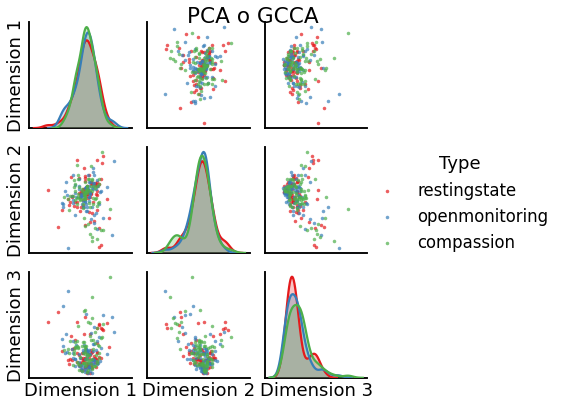

In [44]:
plot = pairplot(projs, [f'{b}' for a,b in y], title=f'PCA o GCCA', palette='Set1',height=2)
#plt.savefig(basedir / 'reports' / 'lol' / f'pca_o_gcca_pairplot.png')

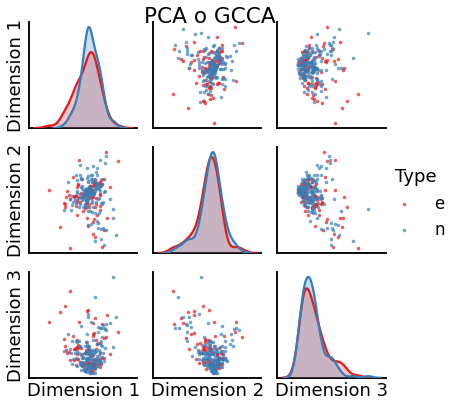

In [45]:
plot = pairplot(projs, [f'{a}' for a,b in y], title=f'PCA o GCCA', palette='Set1',height=2)
#plt.savefig(basedir / 'reports' / 'lol' / f'pca_o_gcca_pairplot.png')